<a href="https://colab.research.google.com/github/vhppacheco/ic-ita-finance-ia/blob/main/clustering/clustering_modeling_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libs

In [1]:
!pip install -q yfinance
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install sqldf
!pip install -q tsfeatures
!pip install umap-learn

     |████████████████████████████████| 6.4 MB 21.1 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 968 kB 7.7 MB/s 
     |████████████████████████████████| 359 kB 61.0 MB/s 
     |████████████████████████████████| 138 kB 21.5 MB/s 
     |████████████████████████████████| 3.6 MB 19.2 MB/s 
     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 58 kB 2.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's depend

In [2]:
import requests
import pandas as pd
from time import sleep
import yfinance as yf
from bs4 import BeautifulSoup
from selenium import webdriver
import json
import sys
import datetime

from google.colab import drive
drive.mount('/content/drive')



from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,12
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: use options instead of chrome_options


# Concatenado

##Reading data

In [4]:
df_ibov = pd.read_excel('/content/drive/MyDrive/IC ITA/Projeto de Pesquisa - IC ITA/Ibovespa/Bases de dados/Economatica/DataFrames/df_Ibov_Final.xlsx')
df_ibov['Indice'] = 'Ibov'

df_sp500 =  pd.read_excel('/content/drive/MyDrive/IC ITA/Projeto de Pesquisa - IC ITA/S&P 500/Bases de dados/Economatica/DataFrames/df_SP500_Final.xlsx')
df_sp500['Indice'] = 'S&P 500'

df_indicators = pd.concat([df_ibov,df_sp500]).sort_values(by='Data', ascending = True).set_index('Data')

In [19]:
df_indicators.head()

,LiqCor consolid:sim*,LiqSec consolid:sim*,Exig / PL consolid:sim*,DivBr/Ebitda de 3 meses consolid:sim*,Margem Liquida de 3 meses consolid:sim*,ROA de 3 meses,ROE de 3 meses,P/L de 3 meses ajust pela infl,Valor Mercado da empresa Em US Dollars em milhares,Patrim Liq Em US Dollars em milhares consolid:sim*,...,Volatilidade base trimestral 3 meses Em moeda orig,Sharpe,VAR % base diária confiança: 95% 3 meses Em moeda orig,Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig,Data do Bal consolid:sim*,Código,Setor NAICS,Indice,Sharpe Ratio,Código ajustado
Data,,,,,,,,,,,,,,,,,,,,,
1T2016,0.011157,0.008663,0.310508,0.117242,0.917995,0.568058,0.328780,0.032399,0.028477,0.060140,...,0.088551,0.602582,0.080469,0.863231,2016-03-31,ABEV3,Indústria manufatureira,Ibov,0.034759,ABEV3.SA
1T2016,0.076697,0.077567,0.310461,0.117194,0.917907,0.558387,0.328052,0.032412,0.178111,0.270507,...,0.080401,-0.002415,0.072310,0.870780,2016-03-31,GOOGL,"Serviços profissionais, científicos e técnicos",S&P 500,0.030104,GOOGL
1T2016,0.016520,0.017325,0.310922,0.118584,0.917568,0.532687,0.328148,0.032351,0.000370,0.036106,...,0.076855,3.922680,0.069784,0.862286,2016-03-31,ENGI11,"Empresa de eletricidade, gás e água",Ibov,0.060308,ENGI11.SA
1T2016,0.032602,0.014528,0.310777,0.117210,0.917550,0.530701,0.327687,0.032492,0.000836,0.035824,...,0.168896,0.034416,0.155983,0.791244,2016-03-31,GNRC,Indústria manufatureira,S&P 500,0.030387,GNRC
1T2016,0.012329,0.010028,0.310871,0.117195,0.917590,0.535800,0.328422,0.032346,0.016651,0.112958,...,0.083620,-0.008304,0.075254,1.000000,2016-03-31,GM,Indústria manufatureira,S&P 500,0.030058,GM


##EDA

In [8]:
df_indicators.isnull().sum()

 LiqCor  consolid:sim*                                            0
 LiqSec  consolid:sim*                                            0
 Exig / PL  consolid:sim*                                         0
 DivBr/Ebitda  de 3 meses  consolid:sim*                          0
 Margem Liquida  de 3 meses  consolid:sim*                        0
ROA de 3 meses                                                    0
ROE de 3 meses                                                    0
P/L de 3 meses ajust pela infl                                    0
Valor Mercado da empresa Em US Dollars em milhares                0
 Patrim Liq  Em US Dollars  em milhares  consolid:sim*            0
Price/Book ratio                                                  0
EV Em US Dollars em milhares consolid:sim*                        0
EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*              0
P/FCF Em US Dollars de 3 meses consolid:sim*                      0
Media do fechamento em 1 trimestre Em US Dollars

In [10]:
#Cria as colunas de sharpe ratio e beta unindo o sp500 e ibov
df_indicators['Sharpe Ratio'] = df_indicators['Sharpe'].fillna(0) + df_indicators['Sharpe'].fillna(0)
df_indicators['Beta'] = df_indicators['Beta'].fillna(0) + df_indicators['Beta'].fillna(0)
# df_indicators.drop(['Sharpe Ibov','Sharpe SP500','Beta Ibov','Beta sp500'],axis='columns',inplace=True)

In [11]:
df_indicators.isna().sum()

 LiqCor  consolid:sim*                                            0
 LiqSec  consolid:sim*                                            0
 Exig / PL  consolid:sim*                                         0
 DivBr/Ebitda  de 3 meses  consolid:sim*                          0
 Margem Liquida  de 3 meses  consolid:sim*                        0
ROA de 3 meses                                                    0
ROE de 3 meses                                                    0
P/L de 3 meses ajust pela infl                                    0
Valor Mercado da empresa Em US Dollars em milhares                0
 Patrim Liq  Em US Dollars  em milhares  consolid:sim*            0
Price/Book ratio                                                  0
EV Em US Dollars em milhares consolid:sim*                        0
EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*              0
P/FCF Em US Dollars de 3 meses consolid:sim*                      0
Media do fechamento em 1 trimestre Em US Dollars

In [12]:
#Cria a coluna Código ajustado, que tem o ".SA" no final do ticker das ações brasileiras
df_indicators['Código ajustado']=df_indicators['Código']
df_indicators.loc[df_indicators['Indice']=='Ibov','Código ajustado'] = df_indicators.loc[df_indicators['Indice']=='Ibov','Código ajustado']+str('.SA')

In [13]:
df_indicators.sort_values(by='Sharpe Ratio',ascending=False).head(10)

,LiqCor consolid:sim*,LiqSec consolid:sim*,Exig / PL consolid:sim*,DivBr/Ebitda de 3 meses consolid:sim*,Margem Liquida de 3 meses consolid:sim*,ROA de 3 meses,ROE de 3 meses,P/L de 3 meses ajust pela infl,Valor Mercado da empresa Em US Dollars em milhares,Patrim Liq Em US Dollars em milhares consolid:sim*,...,Volatilidade base trimestral 3 meses Em moeda orig,Sharpe,VAR % base diária confiança: 95% 3 meses Em moeda orig,Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig,Data do Bal consolid:sim*,Código,Setor NAICS,Indice,Sharpe Ratio,Código ajustado
Data,,,,,,,,,,,,,,,,,,,,,
2T2020,1.171241,0.793256,4.741137,15.680451,0.012311,0.002242,0.012874,319.899453,4.463321e+06,9.220234e+05,...,0.473970,126.037491,0.100794,-0.145854,2020-06-30,VIIA3,Comércio varejista,Ibov,252.074983,VIIA3.SA
2T2019,0.826152,1.627830,6.147602,8.758159,0.057867,0.003896,0.027849,86.624658,2.660698e+06,1.102906e+06,...,0.425204,87.108130,0.092832,-0.173913,2019-06-30,BPAN4,Serviços financeiros e seguros,Ibov,174.216259,BPAN4.SA
2T2020,1.090801,0.781532,7.880433,14.454332,0.201766,0.004377,0.038870,68.123789,1.563549e+07,4.679991e+06,...,0.374168,51.532180,0.078586,-0.180000,2020-06-30,BPAC11,Serviços financeiros e seguros,Ibov,103.064360,BPAC11.SA
3T2017,1.105365,0.654432,5.900982,6.417938,0.032379,0.015551,0.107317,137.034134,4.427051e+06,2.720271e+05,...,0.348765,47.247596,0.072584,-0.079592,2017-09-30,MGLU3,Comércio varejista,Ibov,94.495193,MGLU3.SA
2T2020,2.104166,1.823111,1.952323,42.783600,-0.030654,-0.004536,-0.013393,-750.806848,1.022858e+07,1.017217e+06,...,0.415859,42.446056,0.089988,-0.098218,2020-06-30,AMER3,Comércio varejista,Ibov,84.892113,AMER3.SA
3T2017,2.267484,2.267484,0.522348,3.830376,0.184755,0.033976,0.051724,64.183647,3.024822e+06,9.111067e+05,...,0.214633,42.272584,0.045551,-0.095588,2017-09-30,YDUQ3,Educacão,Ibov,84.545168,YDUQ3.SA
2T2021,0.765141,1.627830,6.678682,8.758159,0.073872,0.004744,0.036428,143.189126,5.796180e+06,1.111222e+06,...,0.324835,41.903542,0.069080,-0.110468,2021-06-30,BPAN4,Serviços financeiros e seguros,Ibov,83.807083,BPAN4.SA
1T2017,3.672323,3.421612,0.547889,453.155963,0.053740,0.002870,0.004443,153.696119,1.919249e+05,2.855255e+05,...,0.271965,40.234191,0.057758,-0.070685,2017-03-31,PRIO3,"Mineração, exploração de pedreiras e extração ...",Ibov,80.468382,PRIO3.SA
4T2016,9.816378,9.399498,0.297568,0.090572,2.519452,0.264753,0.343535,1.002528,8.786412e+04,2.559455e+05,...,0.271965,40.234191,0.057758,-0.070685,2016-12-31,PRIO3,"Mineração, exploração de pedreiras e extração ...",Ibov,80.468382,PRIO3.SA


In [14]:
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12936 entries, 1T2016 to 4T2021
Data columns (total 28 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0    LiqCor  consolid:sim*                                          12936 non-null  float64       
 1    LiqSec  consolid:sim*                                          12936 non-null  float64       
 2    Exig / PL  consolid:sim*                                       12936 non-null  float64       
 3    DivBr/Ebitda  de 3 meses  consolid:sim*                        12936 non-null  float64       
 4    Margem Liquida  de 3 meses  consolid:sim*                      12936 non-null  float64       
 5   ROA de 3 meses                                                  12936 non-null  float64       
 6   ROE de 3 meses                                                  12936 non-null  float

In [15]:
#normaliza as colunas de formato float
columns = [' LiqCor  consolid:sim*', ' LiqSec  consolid:sim*',
       ' Exig / PL  consolid:sim*', ' DivBr/Ebitda  de 3 meses  consolid:sim*',
       ' Margem Liquida  de 3 meses  consolid:sim*', 'ROA de 3 meses',
       'ROE de 3 meses', 'P/L de 3 meses ajust pela infl',
       'Valor Mercado da empresa Em US Dollars em milhares',
       ' Patrim Liq  Em US Dollars  em milhares  consolid:sim*',
       'Price/Book ratio', 'EV Em US Dollars em milhares consolid:sim*',
       'EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*',
       'P/FCF Em US Dollars de 3 meses consolid:sim*',
       'Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov',
       'TIR média trimestral em 3 meses Em moeda orig',
       'Bollinger 90/2 Média Em moeda orig',
       'Volatilidade base trimestral 3 meses Em moeda orig',
       'VAR % base diária confiança: 95% 3 meses Em moeda orig',
       'Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig',
       'Sharpe Ratio', 'Beta']

for column in columns:
  #indicators_application[column] = indicators_application[column].loc[indicators_application[column].isnull()==False]
  #indicators_application = indicators_application[np.isfinite(indicators_application[column]) == True]
  df_indicators[column] = (df_indicators[column]-min(df_indicators[column].dropna())) /(max(df_indicators[column].dropna())-min(df_indicators[column].dropna()))

In [ ]:
periodo = '2021-12-31'
best_10_sharpe = df_indicators.loc[df_indicators[' Data do Bal  consolid:sim*'].astype(str) == periodo].sort_values(by='Sharpe Ratio',ascending=False).head(10)['Código ajustado']
df_indicators.loc[df_indicators[' Data do Bal  consolid:sim*'].astype(str) == periodo].sort_values(by='Sharpe Ratio',ascending=False).head(10)

In [ ]:
for i in range(0,len(best_10_sharpe)):
  plt.plot(pd.DataFrame(yf.download(best_10_sharpe.iloc[i], start = '2018-01-01', end = '2022-02-28')['Adj Close']),label=str(best_10_sharpe.iloc[i]))
  plt.legend()

In [ ]:
for i in range(0,len(best_10_sharpe)):
  if i == 0:
    best_10 = pd.DataFrame(yf.download(best_10_sharpe.iloc[i], start = '2018-01-01', end = '2021-12-31')['Adj Close']).rename(columns={'Adj Close':best_10_sharpe.iloc[i]})
  else:
    best_10[str(best_10_sharpe.iloc[i])] = pd.DataFrame(yf.download(best_10_sharpe.iloc[i], start = '2018-01-01', end = '2021-12-31')['Adj Close']).rename(columns={'Adj Close':best_10_sharpe.iloc[i]})

for column in best_10.columns:
  best_10[column] = (best_10[column]-min(best_10[column])) /(max(best_10[column])-min(best_10[column]))

rcParams['figure.figsize'] = 40,12
for i in range(0,len(best_10.columns)):
  plt.plot(best_10.iloc[:,i],label=best_10.columns[i])
  plt.legend()

In [ ]:
plt.plot(pd.DataFrame(yf.download('LREN3.SA', start = '2018-01-01', end = '2021-12-31')['Adj Close']))

##Models Applications

##UMAP testing

In [16]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10

In [17]:
import umap

In [22]:
indicators_application = df_indicators.loc[(df_indicators[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_indicators[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31')]
#.drop(['Data','Código', ' Data do Bal  consolid:sim*','Indice','Código ajustado'],axis='columns').replace('-',0).astype(float)
indicators_application = indicators_application.fillna(0)

In [23]:
indicators_application = indicators_application.fillna(0)

In [24]:
indicators_data = indicators_application[columns].values
scaled_indicators_data = StandardScaler().fit_transform(indicators_data)

In [25]:
indicators_data.shape

(558, 22)

In [26]:
reducer = umap.UMAP()

In [27]:
embedding = reducer.fit_transform(indicators_data)
embedding.shape 

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(558, 2)

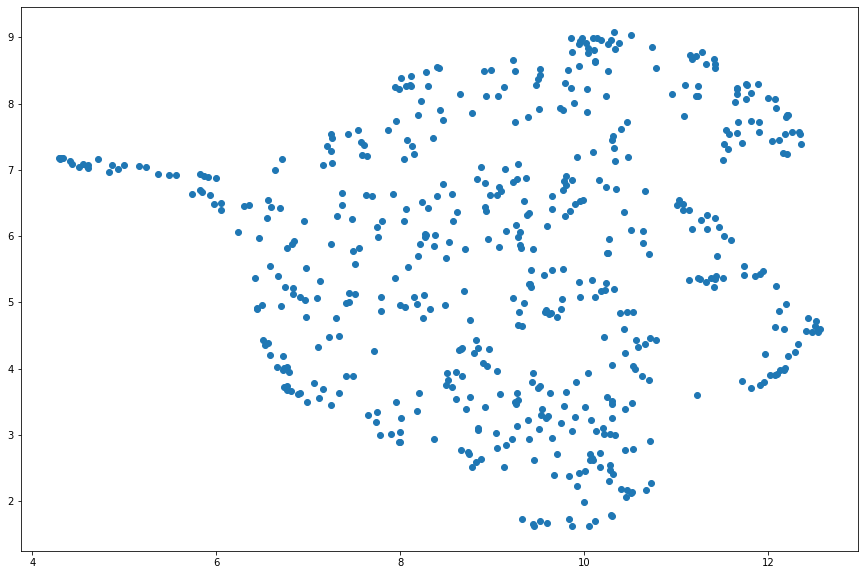

In [28]:
plt.scatter(embedding[:,0], embedding[:,1])

Text(0.5, 1.0, 'UMAP projection of the S&P500 and Ibov Index')

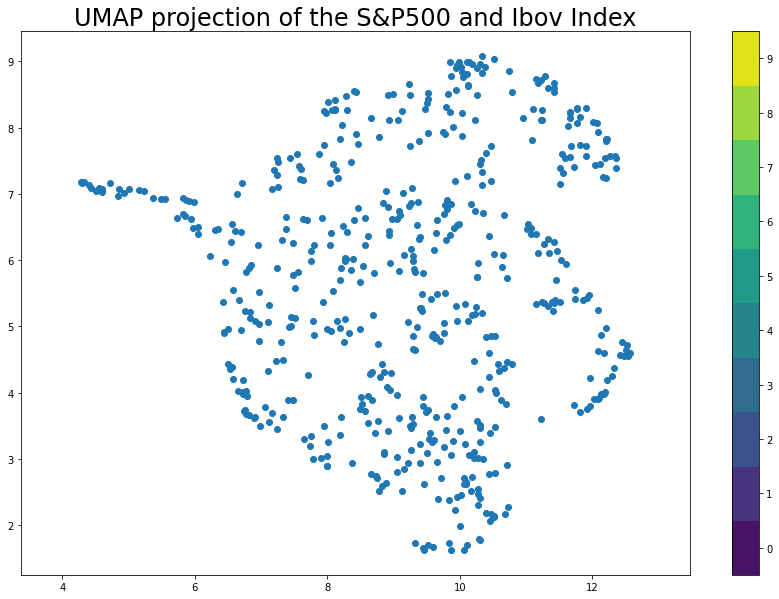

In [29]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    #c=indicators_data
    )
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the S&P500 and Ibov Index', fontsize=24)

In [30]:
data = indicators_data 

In [31]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], 
                   range(len(u)), 
                   #c=data
                   )
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], 
                   u[:,1], 
                   #c=data
                   )
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], 
                   u[:,1], 
                   u[:,2], 
                   #c=data
                   )
    plt.title(title, fontsize=18)

In [ ]:
#for n in (2, 5, 10, 20, 50, 100, 200,300,400,500):
#    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

In [ ]:
#for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
#    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

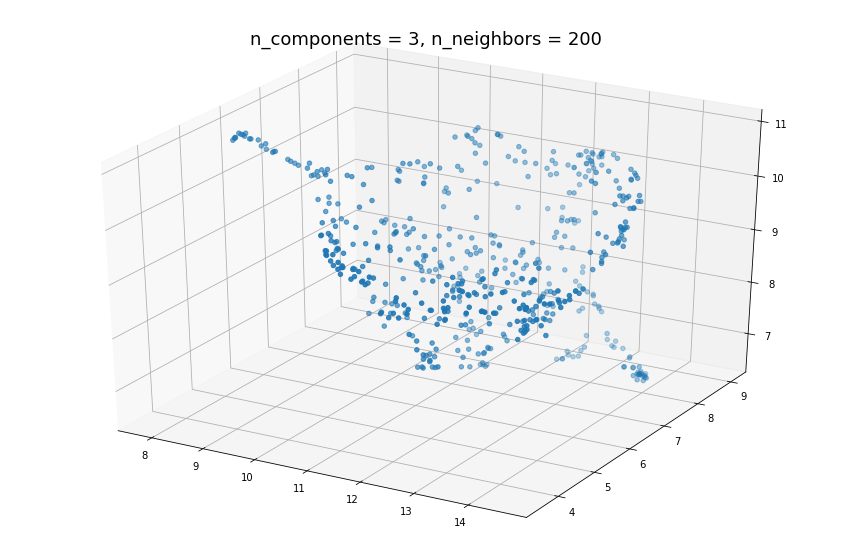

In [32]:
draw_umap(n_components=3,n_neighbors=15, title='n_components = 3, n_neighbors = 200')

##K-Means application for UMAP output

In [33]:
kmeans_input = pd.DataFrame(embedding)
kmeans_input.rename(columns={0:'x',1:'y'},inplace=True)

In [34]:
columns = ['x','y']
#Normalização dos dados
for column in columns:
  kmeans_input[column] = (kmeans_input[column]-min(kmeans_input[column].dropna()))/(max(kmeans_input[column].dropna())-min(kmeans_input[column].dropna()))

In [35]:
X = kmeans_input.iloc[:,[0,1]].values

In [36]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [37]:
WCSS = []

In [38]:
for i in range (1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

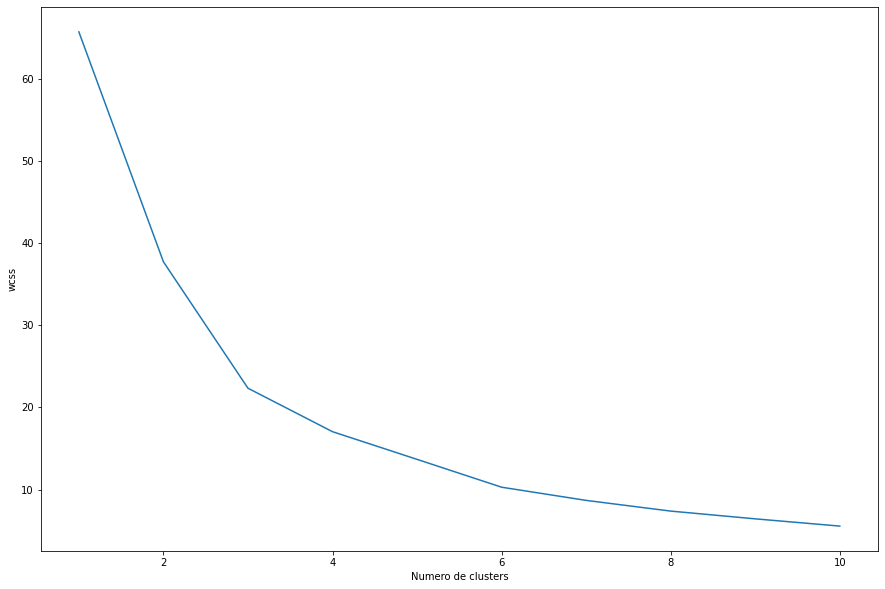

In [39]:
plt.plot(range(1,11),WCSS)
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')

In [40]:
kmeans = KMeans(n_clusters=4, random_state=0)
previsoes = kmeans.fit_predict(X)

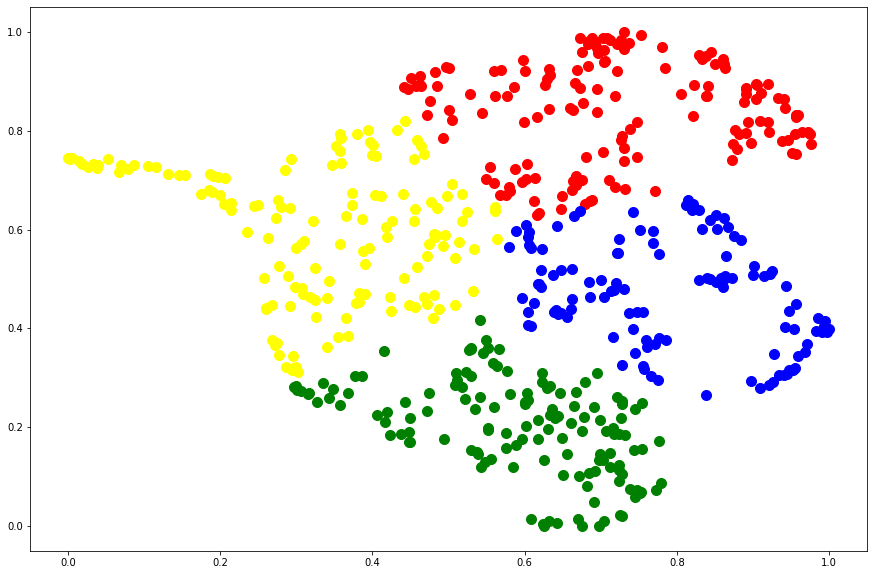

In [41]:
plt.scatter(X[previsoes == 0,0], X[previsoes == 0,1],s=100, c='red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1,0], X[previsoes == 1,1],s=100, c='green', label = 'Cluster 2')
plt.scatter(X[previsoes == 2,0], X[previsoes == 2,1],s=100, c='blue', label = 'Cluster 3')
plt.scatter(X[previsoes == 3,0], X[previsoes == 3,1],s=100, c='yellow', label = 'Cluster 4')
plt.scatter(X[previsoes == 4,0], X[previsoes == 4,1],s=100, c='orange', label = 'Cluster 5')

In [42]:
kmeans_output = pd.DataFrame(np.column_stack((kmeans_input, previsoes)))

In [43]:
kmeans_output

,0,1,2
0,0.823101,0.893530,0.0
1,0.542764,0.119875,1.0
2,0.599959,0.250778,1.0
3,0.368077,0.384298,3.0
4,0.724193,0.185742,1.0
...,...,...,...
553,0.865016,0.546076,2.0
554,0.751867,0.066472,1.0
555,0.629967,0.904080,0.0
556,0.702695,0.756679,0.0


In [44]:
kmeans_output = kmeans_output.rename(columns={0:'x',1:'y',2:'Cluster'})

In [45]:
#preenchendo a coluna de clusters no dataframe principal
indicators_application['Cluster UMAP K-Means'] = ''
for i in range(0,len(indicators_application)):
  cluster = int(kmeans_output['Cluster'].iloc[i])
  indicators_application['Cluster UMAP K-Means'].iloc[i] = int(cluster)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [46]:
kmeans_output.groupby('Cluster',dropna=False).count()

,x,y
Cluster,,
0.0,152,152
1.0,140,140
2.0,118,118
3.0,148,148


##UMAP n-neighbors x WCSS K-means

In [ ]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [ ]:
#função que plota o gráfico do WCSS pra cada n_neighbors do UMAP e adiciona os resultados numa matriz
def umap_kmeans(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);

    #k-means
    kmeans_input = pd.DataFrame(u)
    kmeans_input.rename(columns={0:'x',1:'y'},inplace=True)

    columns = ['x','y']
    for column in columns:
      kmeans_input[column] = (kmeans_input[column]-min(kmeans_input[column].dropna()))/(max(kmeans_input[column].dropna())-min(kmeans_input[column].dropna()))

    X = kmeans_input.iloc[:,[0,1]].values

    WCSS = []
    for i in range (1,11):
      kmeans = KMeans(n_clusters=i,random_state=0)
      kmeans.fit(X)
      WCSS.append(kmeans.inertia_)

    rel_umap_kmeans[0].append(n_neighbors)
    rel_umap_kmeans[1].append(optimal_number_of_clusters(WCSS))

    plt.plot(range(1,11),WCSS)
    plt.xlabel('Numero de clusters')
    plt.ylabel('wcss')

In [ ]:
rel_umap_kmeans = [[],[]]

for n in range(2,200+1):
    umap_kmeans(n_neighbors=n, title='n_neighbors = {}'.format(n))

In [ ]:
test = pd.DataFrame(rel_umap_kmeans).T
test.rename(columns={0:'n_neighbors',1:'n_clusters'},inplace=True)

In [ ]:
test

In [ ]:
plt.plot(test['n_neighbors'],test['n_clusters'])
plt.xlabel('n_neighbors')
plt.ylabel('n_clusters')

##K-Means application for the same features used in UMAP

In [120]:
indicators_data.shape

(558, 22)

In [121]:
X = indicators_data#.iloc[:,[0,13]].values

In [122]:
X

array([[0.03508696, 0.0261498 , 0.31055066, ..., 0.92034401, 0.03017488,
        0.23265066],
       [0.02747293, 0.01704988, 0.31056628, ..., 0.93436946, 0.03001037,
        0.44699197],
       [0.04548618, 0.03384371, 0.31050485, ..., 0.90446809, 0.03004699,
        0.42051843],
       ...,
       [0.00581624, 0.00468101, 0.3108304 , ..., 0.86696021, 0.03031055,
        0.26407315],
       [0.00581624, 0.00468101, 0.31048329, ..., 0.94915306, 0.03132125,
        0.30264605],
       [0.05695579, 0.0414443 , 0.31066471, ..., 0.93945997, 0.03082725,
        0.33066802]])

In [123]:
WCSS = []

In [124]:
for i in range (1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

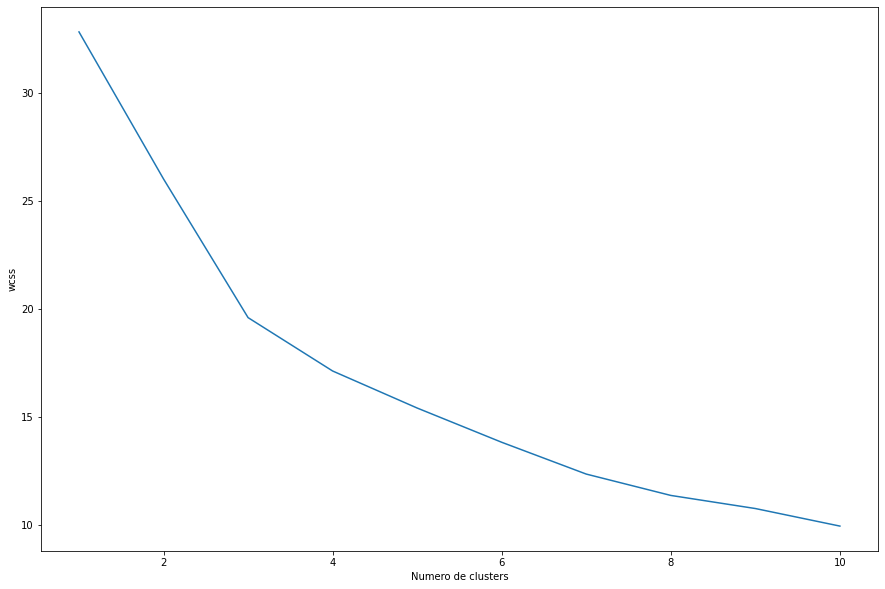

In [125]:
plt.plot(range(1,11),WCSS)
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')

In [126]:
kmeans = KMeans(n_clusters=4, random_state=0)
previsoes = kmeans.fit_predict(X)

In [127]:
kmeans_output = pd.DataFrame(np.column_stack((kmeans_input, previsoes)))

In [128]:
kmeans_output = kmeans_output.rename(columns={0:'x',1:'y',2:'Cluster'})

In [129]:
indicators_application['Cluster k-means'] = ''
for i in range(0,len(indicators_application)):
  cluster = int(kmeans_output['Cluster'].iloc[i])
  indicators_application['Cluster k-means'].iloc[i] = int(cluster)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [130]:
kmeans_output.groupby('Cluster',dropna=False).count()

,x,y
Cluster,,
0.0,332,332
1.0,19,19
2.0,6,6
3.0,201,201


In [131]:
indicators_application.columns

Index([' LiqCor  consolid:sim*', ' LiqSec  consolid:sim*',
       ' Exig / PL  consolid:sim*', ' DivBr/Ebitda  de 3 meses  consolid:sim*',
       ' Margem Liquida  de 3 meses  consolid:sim*', 'ROA de 3 meses',
       'ROE de 3 meses', 'P/L de 3 meses ajust pela infl',
       'Valor Mercado da empresa Em US Dollars em milhares',
       ' Patrim Liq  Em US Dollars  em milhares  consolid:sim*',
       'Price/Book ratio', 'EV Em US Dollars em milhares consolid:sim*',
       'EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*',
       'P/FCF Em US Dollars de 3 meses consolid:sim*',
       'Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov',
       'Beta', 'TIR média trimestral em 3 meses Em moeda orig',
       'Bollinger 90/2 Média Em moeda orig',
       'Volatilidade base trimestral 3 meses Em moeda orig', 'Sharpe',
       'VAR % base diária confiança: 95% 3 meses Em moeda orig',
       'Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig',
       ' Data do Bal  consolid:sim

##PAM

In [47]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 17.7 MB/s 


In [48]:
# — — — — — — -Importing Packages — — — — — — — — — — — -
from sklearn_extra.cluster import KMedoids

In [49]:
X = kmeans_input.iloc[:,[0,1]].values

In [50]:
kmedoids = KMedoids(n_clusters=4, random_state=0).fit(X)

In [51]:
import random

In [52]:
kmeans_input

,x,y
0,0.823101,0.893530
1,0.542764,0.119875
2,0.599959,0.250778
3,0.368077,0.384298
4,0.724193,0.185742
...,...,...
553,0.865016,0.546076
554,0.751867,0.066472
555,0.629967,0.904080
556,0.702695,0.756679


In [53]:
X[random.randint(0, len(X))]

array([0.60220367, 0.702304  ], dtype=float32)

In [54]:
kmedoids.predict([X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))]])

array([0, 2, 0, 1])

In [55]:
kmedoids.cluster_centers_

array([[0.6170809 , 0.21531668],
       [0.7188121 , 0.86940974],
       [0.7759817 , 0.5506548 ],
       [0.3655027 , 0.6268532 ]], dtype=float32)

In [56]:
kmedoids.inertia_

90.637344

Text(0.5, 1.0, 'KMedoids clustering. Medoids are represented in cyan.')

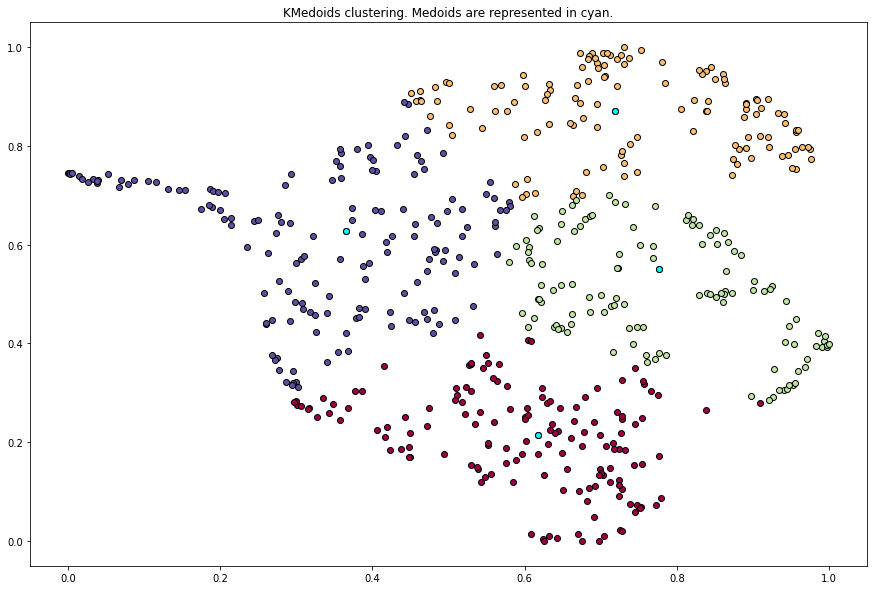

In [57]:
labels = kmedoids.labels_

unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):

    class_member_mask = labels == k

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.plot(
    kmedoids.cluster_centers_[:, 0],
    kmedoids.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6,
)

plt.title("KMedoids clustering. Medoids are represented in cyan.")

In [58]:
kmedoids.cluster_centers_

array([[0.6170809 , 0.21531668],
       [0.7188121 , 0.86940974],
       [0.7759817 , 0.5506548 ],
       [0.3655027 , 0.6268532 ]], dtype=float32)

In [59]:
kmedoids.labels_[100]

0

In [60]:
len(kmedoids.labels_) - len(indicators_application)

0

In [61]:
indicators_application['Cluster PAM'] = ''
for i in range(0,len(indicators_application)):
  cluster = int(kmedoids.labels_[i])
  indicators_application['Cluster PAM'].iloc[i] = int(cluster)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#Hierarchical Clustering and Networks



In [ ]:
pip install Riskfolio-Lib

In [ ]:
pip install -U matplotlib

In [72]:
Y = kmeans_input
Y

,x,y
0,0.823101,0.893530
1,0.542764,0.119875
2,0.599959,0.250778
3,0.368077,0.384298
4,0.724193,0.185742
...,...,...
553,0.865016,0.546076
554,0.751867,0.066472
555,0.629967,0.904080
556,0.702695,0.756679


<Figure size 21600x21600 with 0 Axes>

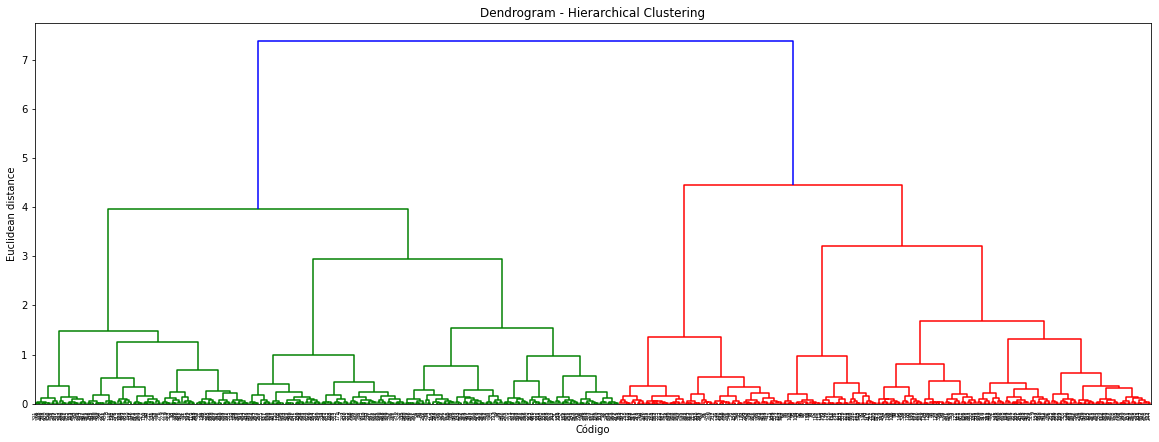

<Figure size 21600x21600 with 0 Axes>

In [109]:
import scipy.cluster.hierarchy as sc

# Plot dendrogram
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  

# Create dendrogram
sc.dendrogram(sc.linkage(Y, method='ward'))

plt.title('Dendrogram - Hierarchical Clustering')
plt.xlabel('Código')
plt.ylabel('Euclidean distance')
plt.figure(figsize = (300, 300))

In [82]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(
    n_clusters=3, affinity='euclidean', linkage='ward')

cluster.fit(Y)
labels = cluster.labels_
labels

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 1, 1,
       1, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 1, 1, 2, 0, 1, 1, 0, 2, 0, 1, 1,
       0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       1, 0, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0,
       2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0,

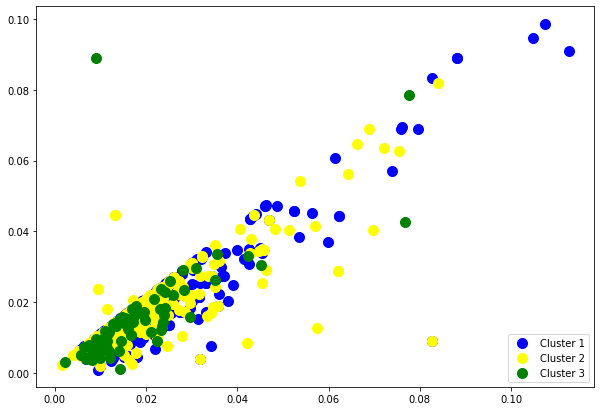

In [94]:
indicators = indicators_application.values

plt.figure(figsize=(10, 7))
plt.scatter(indicators[labels == 0, 0], indicators[labels == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(indicators[labels == 1, 0], indicators[labels == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(indicators[labels == 2, 0], indicators[labels == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.legend()
plt.show()

In [112]:
indicators_application['Cluster Hierarchical'] = ''
for i in range(0,len(indicators_application)):
  cluster = int(kmedoids.labels_[i])
  indicators_application['Cluster Hierarchical'].iloc[i] = int(cluster)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Consolidação

In [113]:
df_indicators.columns

Index([' LiqCor  consolid:sim*', ' LiqSec  consolid:sim*',
       ' Exig / PL  consolid:sim*', ' DivBr/Ebitda  de 3 meses  consolid:sim*',
       ' Margem Liquida  de 3 meses  consolid:sim*', 'ROA de 3 meses',
       'ROE de 3 meses', 'P/L de 3 meses ajust pela infl',
       'Valor Mercado da empresa Em US Dollars em milhares',
       ' Patrim Liq  Em US Dollars  em milhares  consolid:sim*',
       'Price/Book ratio', 'EV Em US Dollars em milhares consolid:sim*',
       'EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*',
       'P/FCF Em US Dollars de 3 meses consolid:sim*',
       'Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov',
       'Beta', 'TIR média trimestral em 3 meses Em moeda orig',
       'Bollinger 90/2 Média Em moeda orig',
       'Volatilidade base trimestral 3 meses Em moeda orig', 'Sharpe',
       'VAR % base diária confiança: 95% 3 meses Em moeda orig',
       'Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig',
       ' Data do Bal  consolid:sim

In [114]:
len(indicators_application) - len(df_indicators)

-12378

In [115]:
df_indicators['Cluster UMAP K-Means'] = ''
df_indicators['Cluster k-means'] = ''
df_indicators['Cluster PAM'] = ''
df_indicators['Cluster Hierarchical'] = ''

In [132]:
df_indicators.loc[(df_indicators[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_indicators[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31'),'Cluster UMAP K-Means'] = indicators_application['Cluster UMAP K-Means'].astype(float)
df_indicators.loc[(df_indicators[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_indicators[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31'),'Cluster k-means'] = indicators_application['Cluster k-means'].astype(float)
df_indicators.loc[(df_indicators[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_indicators[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31'),'Cluster PAM'] = indicators_application['Cluster PAM'].astype(float)
df_indicators.loc[(df_indicators[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_indicators[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31'),'Cluster Hierarchical'] = indicators_application['Cluster Hierarchical'].astype(float)

In [133]:
df_indicators_dtref = df_indicators.loc[(df_indicators[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_indicators[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31')]

In [135]:
df_indicators_dtref[['Cluster UMAP K-Means', 'Cluster k-means', 'Cluster PAM','Cluster Hierarchical']] = df_indicators_dtref[['Cluster UMAP K-Means', 'Cluster k-means', 'Cluster PAM','Cluster Hierarchical']].astype(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


# IBOVESPA

##Models Applications

##UMAP testing

In [ ]:
ibov_application = df_ibov.loc[(df_ibov[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_ibov[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31')].drop(['Data','Código', ' Data do Bal  consolid:sim*','Indice'],axis='columns').replace('-',0).astype(float)
ibov_application = ibov_application.fillna(0)

In [ ]:
ibov_application.columns

In [ ]:
columns = [#'Fechamento ajust p/ prov Em moeda orig',
       #' Ativo Tot  ajust por infl  em milhares  consolid:sim*',
      ' LiqCor  consolid:sim*', ' LiqSec  consolid:sim*',
       ' Exig / PL  consolid:sim*', ' DivBr/Ebitda  de 3 meses  consolid:sim*',
       ' Margem Liquida  de 3 meses  consolid:sim*', 'ROA de 3 meses',
       'ROE de 3 meses', 'P/L de 3 meses ajust pela infl',
       'Valor Mercado da empresa Em US Dollars em milhares',
       ' Patrim Liq  Em US Dollars  em milhares  consolid:sim*',
       'Price/Book ratio', 'EV Em US Dollars em milhares consolid:sim*',
       'EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*',
       'P/FCF Em US Dollars de 3 meses consolid:sim*',
       'Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov',
       'Beta Ibov', 'TIR média trimestral em 3 meses Em moeda orig',
       'Bollinger 90/2 Média Em moeda orig',
       'Volatilidade base trimestral 3 meses Em moeda orig', 'Sharpe Ibov',
       'VAR % base diária confiança: 95% 3 meses Em moeda orig',
       'Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig']

for column in columns:
  ibov_application[column] = (ibov_application[column]-min(ibov_application[column].dropna())) /(max(ibov_application[column].dropna())-min(ibov_application[column].dropna()))

In [ ]:
#ibov_application = ibov_application.fillna(0)

In [ ]:
ibov_data = ibov_application[columns].values
scaled_ibov_data_data = StandardScaler().fit_transform(ibov_data)

In [ ]:
ibov_data.shape

In [ ]:
reducer = umap.UMAP()

In [ ]:
embedding_ibov = reducer.fit_transform(ibov_data)
embedding_ibov.shape 

In [ ]:
plt.scatter(embedding_ibov[:,0], embedding_ibov[:,1])

In [ ]:
plt.scatter(
    embedding_ibov[:, 0],
    embedding_ibov[:, 1],
    #c=indicators_data
    )
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the S&P500 and Ibov Index', fontsize=24)

In [ ]:
data = ibov_data

In [ ]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], 
                   range(len(u)), 
                   #c=data
                   )
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], 
                   u[:,1], 
                   #c=data
                   )
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], 
                   u[:,1], 
                   u[:,2], 
                   #c=data
                   )
    plt.title(title, fontsize=18)

In [ ]:
#for n in (2, 5, 10, 20, 50, 100, 200):
#    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

In [ ]:
#for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
#    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

In [ ]:
draw_umap(n_components=3,n_neighbors=500, title='n_components = 3, n_neighbors = 500')

##K-Means application for UMAP output

In [ ]:
kmeans_input_ibov = pd.DataFrame(embedding_ibov)
kmeans_input_ibov.rename(columns={0:'x',1:'y'},inplace=True)

In [ ]:
columns = ['x','y']
#Normalização dos dados
for column in columns:
  kmeans_input_ibov[column] = (kmeans_input_ibov[column]-min(kmeans_input_ibov[column].dropna()))/(max(kmeans_input_ibov[column].dropna())-min(kmeans_input_ibov[column].dropna()))

In [ ]:
X = kmeans_input_ibov.iloc[:,[0,1]].values

In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
WCSS = []

In [ ]:
for i in range (1,11):
  kmeans_ibov = KMeans(n_clusters=i,random_state=0)
  kmeans_ibov.fit(X)
  WCSS.append(kmeans_ibov.inertia_)

In [ ]:
plt.plot(range(1,11),WCSS)
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')

In [ ]:
kmeans_ibov = KMeans(n_clusters=4, random_state=0)
previsoes = kmeans_ibov.fit_predict(X)

In [ ]:
plt.scatter(X[previsoes == 0,0], X[previsoes == 0,1],s=100, c='red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1,0], X[previsoes == 1,1],s=100, c='green', label = 'Cluster 2')
plt.scatter(X[previsoes == 2,0], X[previsoes == 2,1],s=100, c='blue', label = 'Cluster 3')
plt.scatter(X[previsoes == 3,0], X[previsoes == 3,1],s=100, c='yellow', label = 'Cluster 4')
#plt.scatter(X[previsoes == 4,0], X[previsoes == 4,1],s=100, c='yellow', label = 'Cluster 5')

In [ ]:
kmeans_output_ibov = pd.DataFrame(np.column_stack((kmeans_input_ibov, previsoes)))

In [ ]:
kmeans_output_ibov

In [ ]:
kmeans_output_ibov = kmeans_output_ibov.rename(columns={0:'x',1:'y',2:'Cluster'})

In [ ]:
#preenchendo a coluna de clusters no dataframe principal
ibov_application['Cluster UMAP K-Means'] = ''
for i in range(0,len(ibov_application)):
  cluster = int(kmeans_output_ibov['Cluster'].iloc[i])
  ibov_application['Cluster UMAP K-Means'].iloc[i] = int(cluster)

In [ ]:
kmeans_output_ibov.groupby('Cluster',dropna=False).count()

##K-Means application for the same features used in UMAP

In [ ]:
ibov_data.shape

In [ ]:
X = ibov_data#.iloc[:,[0,13]].values

In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,12
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
X

In [ ]:
WCSS = []

In [ ]:
for i in range (1,11):
  kmeans_ibov = KMeans(n_clusters=i,random_state=0)
  kmeans_ibov.fit(X)
  WCSS.append(kmeans_ibov.inertia_)

In [ ]:
plt.plot(range(1,11),WCSS)
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')

In [ ]:
kmeans_ibov = KMeans(n_clusters=3, random_state=0)
previsoes = kmeans_ibov.fit_predict(X)

In [ ]:
kmeans_output_ibov = pd.DataFrame(np.column_stack((kmeans_input_ibov, previsoes)))

In [ ]:
kmeans_output_ibov = kmeans_output_ibov.rename(columns={0:'x',1:'y',2:'Cluster'})

In [ ]:
ibov_application['Cluster k-means'] = ''
for i in range(0,len(ibov_application)):
  cluster = int(kmeans_output_ibov['Cluster'].iloc[i])
  ibov_application['Cluster k-means'].iloc[i] = int(cluster)

In [ ]:
kmeans_output_ibov.groupby('Cluster',dropna=False).count()

In [ ]:
ibov_application

##PAM

In [ ]:
!pip install scikit-learn-extra

In [ ]:
# — — — — — — -Importing Packages — — — — — — — — — — — -
from sklearn_extra.cluster import KMedoids

In [ ]:
PAM_input_ibov = pd.DataFrame(embedding_ibov)
PAM_input_ibov.rename(columns={0:'x',1:'y'},inplace=True)

In [ ]:
columns = ['x','y']
#Normalização dos dados
for column in columns:
  PAM_input_ibov[column] = (PAM_input_ibov[column]-min(PAM_input_ibov[column].dropna()))/(max(PAM_input_ibov[column].dropna())-min(PAM_input_ibov[column].dropna()))

In [ ]:
X = PAM_input_ibov.iloc[:,[0,1]].values

In [ ]:
kmedoids = KMedoids(n_clusters=4, random_state=0).fit(X)

In [ ]:
import random

In [ ]:
X[random.randint(0, len(kmeans_input_ibov.iloc[:,[0,1]].values))]

In [ ]:
kmedoids.predict([X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))]])

In [ ]:
kmedoids.cluster_centers_

In [ ]:
kmedoids.inertia_

In [ ]:
labels = kmedoids.labels_

unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):

    class_member_mask = labels == k

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.plot(
    kmedoids.cluster_centers_[:, 0],
    kmedoids.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6,
)

plt.title("KMedoids clustering. Medoids are represented in cyan.")

In [ ]:
kmedoids.cluster_centers_

In [ ]:
kmedoids.labels_

In [ ]:
ibov_application['Cluster PAM'] = ''
for i in range(0,len(ibov_application)):
  cluster = int(kmedoids.labels_[i])
  ibov_application['Cluster PAM'].iloc[i] = int(cluster)

## Consolidação

In [ ]:
ibov_application.columns

In [ ]:
len(ibov_application) - len(df_ibov)

In [ ]:
df_ibov['Cluster UMAP K-Means'] = ''
df_ibov['Cluster k-means'] = ''
df_ibov['Cluster PAM'] = ''

In [ ]:
df_ibov.loc[(df_ibov[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_ibov[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31'),'Cluster UMAP K-Means'] = ibov_application['Cluster UMAP K-Means'].astype(float)
df_ibov.loc[(df_ibov[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_ibov[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31'),'Cluster k-means'] = ibov_application['Cluster k-means'].astype(float)
df_ibov.loc[(df_ibov[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_ibov[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31'),'Cluster PAM'] = ibov_application['Cluster PAM'].astype(float)

In [ ]:
ibov_dtref = df_ibov.loc[(df_ibov[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_ibov[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31')]

In [ ]:
ibov_dtref[['Cluster UMAP K-Means', 'Cluster k-means', 'Cluster PAM']] = ibov_dtref[['Cluster UMAP K-Means', 'Cluster k-means', 'Cluster PAM']].astype(float)

In [ ]:
ibov_dtref.loc[(ibov_dtref[' Data do Bal  consolid:sim*'].astype(str)>='2021-12-01') & (ibov_dtref[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31')][' Data do Bal  consolid:sim*'].drop_duplicates().reset_index().sort_values(by=' Data do Bal  consolid:sim*')

In [ ]:
ibov_dtref.loc[(ibov_dtref[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (ibov_dtref[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31')]['Código'].drop_duplicates().reset_index().sort_values(by='Código')

# S&P500

##Models Applications

##UMAP testing

In [ ]:
df_sp500 = pd.read_excel('/content/drive/MyDrive/IC ITA/df_SP500_Final.xlsx')
df_sp500['Indice'] = 'S&P500'

In [ ]:
sp500_application = df_sp500.loc[(df_sp500[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_sp500[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31')].drop(['Data','Código', ' Data do Bal  consolid:sim*','Indice'],axis='columns').replace('-',0).astype(float)
sp500_application = sp500_application.fillna(0)

In [ ]:
df_sp500.loc[(df_sp500[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_sp500[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31')].drop(['Data','Código', ' Data do Bal  consolid:sim*','Indice'],axis='columns').replace('-',0).astype(float)

In [ ]:
df_sp500.dtypes

In [ ]:
sp500_application.columns

In [ ]:
columns = [' LiqCor  consolid:sim*', ' LiqSec  consolid:sim*',
       ' Exig / PL  consolid:sim*', ' DivBr/Ebitda  de 3 meses  consolid:sim*',
       ' Margem Liquida  de 3 meses  consolid:sim*', 'ROA de 3 meses',
       'ROE de 3 meses', 'P/L de 3 meses ajust pela infl',
       'Valor Mercado da empresa Em US Dollars em milhares',
       ' Patrim Liq  Em US Dollars  em milhares  consolid:sim*',
       'Price/Book ratio', 'EV Em US Dollars em milhares consolid:sim*',
       'EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*',
       'P/FCF Em US Dollars de 3 meses consolid:sim*',
       'Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov',
       'Beta sp500', 'TIR média trimestral em 3 meses Em moeda orig',
       'Bollinger 90/2 Média Em moeda orig',
       'Volatilidade base trimestral 3 meses Em moeda orig', 'Sharpe SP500',
       'VAR % base diária confiança: 95% 3 meses Em moeda orig',
       'Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig']

for column in columns:
  sp500_application[column] = (sp500_application[column]-min(sp500_application[column].dropna())) /(max(sp500_application[column].dropna())-min(sp500_application[column].dropna()))

In [ ]:
sp500_application = sp500_application.fillna(0)

In [ ]:
sp500_data = sp500_application[columns].values
scaled_sp500_data_data = StandardScaler().fit_transform(sp500_data)

In [ ]:
sp500_data.shape

In [ ]:
reducer = umap.UMAP(n_neighbors=200)

In [ ]:
embedding_sp500 = reducer.fit_transform(sp500_data)
embedding_sp500.shape 

In [ ]:
plt.scatter(embedding_sp500[:,0], embedding_sp500[:,1])

In [ ]:
plt.scatter(
    embedding_sp500[:, 0],
    embedding_sp500[:, 1],
    #c=indicators_data
    )
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the S&P500 and sp500 Index', fontsize=24)

In [ ]:
data = sp500_data

In [ ]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], 
                   range(len(u)), 
                   #c=data
                   )
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], 
                   u[:,1], 
                   #c=data
                   )
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], 
                   u[:,1], 
                   u[:,2], 
                   #c=data
                   )
    plt.title(title, fontsize=18)

In [ ]:
#for n in (2, 5, 10, 20, 50, 100, 200,500):
#    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

In [ ]:
#for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
#    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

In [ ]:
draw_umap(n_components=3,n_neighbors=500, title='n_components = 3, n_neighbors = 500')

##K-Means application for UMAP output

In [ ]:
kmeans_input_sp500 = pd.DataFrame(embedding_sp500)
kmeans_input_sp500.rename(columns={0:'x',1:'y'},inplace=True)

In [ ]:
columns = ['x','y']
#Normalização dos dados
for column in columns:
  kmeans_input_sp500[column] = (kmeans_input_sp500[column]-min(kmeans_input_sp500[column].dropna()))/(max(kmeans_input_sp500[column].dropna())-min(kmeans_input_sp500[column].dropna()))

In [ ]:
X = kmeans_input_sp500.iloc[:,[0,1]].values

In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
WCSS = []

In [ ]:
for i in range (1,11):
  kmeans_sp500 = KMeans(n_clusters=i,random_state=0)
  kmeans_sp500.fit(X)
  WCSS.append(kmeans_sp500.inertia_)

In [ ]:
plt.plot(range(1,11),WCSS)
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')

In [ ]:
kmeans_sp500 = KMeans(n_clusters=5, random_state=0)
previsoes = kmeans_sp500.fit_predict(X)

In [ ]:
plt.scatter(X[previsoes == 0,0], X[previsoes == 0,1],s=100, c='red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1,0], X[previsoes == 1,1],s=100, c='green', label = 'Cluster 2')
plt.scatter(X[previsoes == 2,0], X[previsoes == 2,1],s=100, c='blue', label = 'Cluster 3')
plt.scatter(X[previsoes == 3,0], X[previsoes == 3,1],s=100, c='yellow', label = 'Cluster 4')
plt.scatter(X[previsoes == 4,0], X[previsoes == 4,1],s=100, c='orange', label = 'Cluster 5')

In [ ]:
kmeans_output_sp500 = pd.DataFrame(np.column_stack((kmeans_input_sp500, previsoes)))

In [ ]:
kmeans_output_sp500

In [ ]:
kmeans_output_sp500 = kmeans_output_sp500.rename(columns={0:'x',1:'y',2:'Cluster'})

In [ ]:
#preenchendo a coluna de clusters no dataframe principal
sp500_application['Cluster UMAP K-Means'] = ''
for i in range(0,len(sp500_application)):
  cluster = int(kmeans_output_sp500['Cluster'].iloc[i])
  sp500_application['Cluster UMAP K-Means'].iloc[i] = int(cluster)

In [ ]:
kmeans_output_sp500.groupby('Cluster',dropna=False).count()

##K-Means application for the same features used in UMAP

In [ ]:
sp500_data.shape

In [ ]:
X = sp500_data#.iloc[:,[0,13]].values

In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,12
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
X

In [ ]:
WCSS = []

In [ ]:
for i in range (1,11):
  kmeans_sp500 = KMeans(n_clusters=i,random_state=0)
  kmeans_sp500.fit(X)
  WCSS.append(kmeans_sp500.inertia_)

In [ ]:
plt.plot(range(1,11),WCSS)
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')

In [ ]:
kmeans_sp500 = KMeans(n_clusters=4, random_state=0)
previsoes = kmeans_sp500.fit_predict(X)

In [ ]:
kmeans_output_sp500 = pd.DataFrame(np.column_stack((kmeans_input_sp500, previsoes)))

In [ ]:
kmeans_output_sp500 = kmeans_output_sp500.rename(columns={0:'x',1:'y',2:'Cluster'})

In [ ]:
sp500_application['Cluster k-means'] = ''
for i in range(0,len(sp500_application)):
  cluster = int(kmeans_output_sp500['Cluster'].iloc[i])
  sp500_application['Cluster k-means'].iloc[i] = int(cluster)

In [ ]:
kmeans_output_sp500.groupby('Cluster',dropna=False).count()

In [ ]:
sp500_application

##PAM

In [ ]:
!pip install scikit-learn-extra

In [ ]:
# — — — — — — -Importing Packages — — — — — — — — — — — -
import matplotlib.pyplot as plt
import numpy as np
from sklearn_extra.cluster import KMedoids

In [ ]:
PAM_input_sp500 = pd.DataFrame(embedding_sp500)
PAM_input_sp500.rename(columns={0:'x',1:'y'},inplace=True)

In [ ]:
columns = ['x','y']
#Normalização dos dados
for column in columns:
  PAM_input_sp500[column] = (PAM_input_sp500[column]-min(PAM_input_sp500[column].dropna()))/(max(PAM_input_sp500[column].dropna())-min(PAM_input_sp500[column].dropna()))

In [ ]:
X = PAM_input_sp500.iloc[:,[0,1]].values

In [ ]:
kmedoids = KMedoids(n_clusters=5, random_state=0).fit(X)

In [ ]:
import random

In [ ]:
X[random.randint(0, len(kmeans_input_sp500.iloc[:,[0,1]].values))]

In [ ]:
kmedoids.predict([X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))]])

In [ ]:
kmedoids.cluster_centers_

In [ ]:
kmedoids.inertia_

In [ ]:
labels = kmedoids.labels_

unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):

    class_member_mask = labels == k

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.plot(
    kmedoids.cluster_centers_[:, 0],
    kmedoids.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6,
)

plt.title("KMedoids clustering. Medoids are represented in cyan.")

In [ ]:
kmedoids.cluster_centers_

In [ ]:
kmedoids.labels_

In [ ]:
sp500_application['Cluster PAM'] = ''
for i in range(0,len(sp500_application)):
  cluster = int(kmedoids.labels_[i])
  sp500_application['Cluster PAM'].iloc[i] = int(cluster)

## Consolidação

In [ ]:
sp500_application.columns

In [ ]:
len(sp500_application) - len(df_sp500)

In [ ]:
df_sp500['Cluster UMAP K-Means'] = ''
df_sp500['Cluster k-means'] = ''
df_sp500['Cluster PAM'] = ''

In [ ]:
df_sp500.loc[(df_sp500[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_sp500[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31'),'Cluster UMAP K-Means'] = sp500_application['Cluster UMAP K-Means'].astype(float)
df_sp500.loc[(df_sp500[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_sp500[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31'),'Cluster k-means'] = sp500_application['Cluster k-means'].astype(float)
df_sp500.loc[(df_sp500[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_sp500[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31'),'Cluster PAM'] = sp500_application['Cluster PAM'].astype(float)

In [ ]:
sp500_dtref = df_sp500.loc[(df_sp500[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_sp500[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31')]

In [ ]:
sp500_dtref[['Cluster UMAP K-Means', 'Cluster k-means', 'Cluster PAM']] = sp500_dtref[['Cluster UMAP K-Means', 'Cluster k-means', 'Cluster PAM']].astype(float)

In [ ]:
df_sp500.loc[(df_sp500[' Data do Bal  consolid:sim*'].astype(str)>='2021-12-01') & (df_sp500[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31')][' Data do Bal  consolid:sim*'].drop_duplicates().reset_index().sort_values(by=' Data do Bal  consolid:sim*')

In [ ]:
df_sp500.loc[(df_sp500[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_sp500[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31')]['Código'].drop_duplicates().reset_index().sort_values(by='Código')

# Analysis

-----------------------------------------------------------
##Análise da distribuição de ações por cluster em cada modelo
-----------------------------------------------------------

In [ ]:
import seaborn as sns
## Figure and plot defaults
plt.rcParams['figure.figsize'] = (18,6) # Increase the default size of plots
plt.subplots_adjust(wspace = 1.5)

In [ ]:
sns.histplot(sp500_dtref['Cluster UMAP K-Means'], color='blue',bins=5)

In [ ]:
sns.histplot(sp500_dtref['Cluster PAM'], color='blue',bins=5)

In [ ]:
sns.histplot(sp500_dtref['Cluster k-means'], color='blue',bins=4)

In [ ]:
sns.lmplot(x ='Cluster UMAP K-Means', y ='Cluster PAM', data = sp500_dtref)

In [ ]:
sp500_dtref[['Cluster UMAP K-Means', 'Cluster PAM', 'Cluster k-means']].corr()

In [ ]:
g = sns.heatmap(
    sp500_dtref[[' LiqCor  consolid:sim*', ' LiqSec  consolid:sim*',
       ' Exig / PL  consolid:sim*', ' DivBr/Ebitda  de 3 meses  consolid:sim*',
       ' Margem Liquida  de 3 meses  consolid:sim*', 'ROA de 3 meses',
       'ROE de 3 meses', 'P/L de 3 meses ajust pela infl',
       'Valor Mercado da empresa Em US Dollars em milhares',
       ' Patrim Liq  Em US Dollars  em milhares  consolid:sim*',
       'Price/Book ratio', 'EV Em US Dollars em milhares consolid:sim*',
       'EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*',
       'P/FCF Em US Dollars de 3 meses consolid:sim*',
       'Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov',
       'Beta sp500', 'TIR média trimestral em 3 meses Em moeda orig',
       'Bollinger 90/2 Média Em moeda orig',
       'Volatilidade base trimestral 3 meses Em moeda orig', 'Sharpe SP500',
       'VAR % base diária confiança: 95% 3 meses Em moeda orig',
       'Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig'  ]].corr(), 
    annot = True, 
    fmt=
    '.2g',
    cmap= 'seismic')

-----------------------------------------------------------
##Seleção dos clusters ótimos e ensemble


---
Equação de seleção do cluster ótimo:

\begin{equation}
\ cluster ótimo \ = max(\frac{Liq. Corrente + Liq. Seca + Margem Líq. + ROA + ROE + TIR + Sharpe}{(\frac{Dívida}{EBITDA}\ + \frac{P}{L}\ + \frac{EV}{EBITDA}\ + \frac{P}{FCF}\ + Volatilidade + Variância + Máx. Drawdoun + \frac{Exigível}{PL}\ + \frac{Price}{Book Ratio}\ + Beta})\
\end{equation}



###Concatenado

In [ ]:
df_indicators_dtref.sort_values(by='Cluster_select',ascending=False).head(10)

In [ ]:
df_indicators_dtref['max'] = df_indicators_dtref[' LiqCor  consolid:sim*']+df_indicators_dtref[' LiqSec  consolid:sim*']+df_indicators_dtref[' Margem Liquida  de 3 meses  consolid:sim*']+df_indicators_dtref['ROA de 3 meses']+df_indicators_dtref['ROE de 3 meses']+df_indicators_dtref['TIR média trimestral em 3 meses Em moeda orig']+df_indicators_dtref['Sharpe Ratio']

In [ ]:
df_indicators_dtref['min'] = df_indicators_dtref[' DivBr/Ebitda  de 3 meses  consolid:sim*']+df_indicators_dtref['P/L de 3 meses ajust pela infl']+df_indicators_dtref['EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*']+df_indicators_dtref['P/FCF Em US Dollars de 3 meses consolid:sim*']+df_indicators_dtref['Volatilidade base trimestral 3 meses Em moeda orig']+df_indicators_dtref['VAR % base diária confiança: 95% 3 meses Em moeda orig']+df_indicators_dtref['Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig']+df_indicators_dtref[' Exig / PL  consolid:sim*']+df_indicators_dtref['Price/Book ratio']+df_indicators_dtref['Beta']

In [ ]:
df_indicators_dtref['Cluster_select'] = df_indicators_dtref['max']/df_indicators_dtref['min']

In [ ]:
df_indicators_dtref.groupby(['Cluster UMAP K-Means'],dropna=False).mean().sort_values(by='Cluster_select',ascending=False)

In [ ]:
stocks_kmeans = df_indicators_dtref.loc[df_indicators_dtref['Cluster UMAP K-Means'].astype(int)==0]

In [ ]:
df_indicators_dtref.groupby(['Cluster PAM'],dropna=False).mean().sort_values(by='Cluster_select',ascending=False)

In [ ]:
stocks_pam = df_indicators_dtref.loc[df_indicators_dtref['Cluster PAM'].astype(int)==0]

In [ ]:
mv_input_total = pd.merge(stocks_kmeans['Código'],stocks_pam['Código'],on='Código',how='inner')
mv_input_total = pd.merge(mv_input_total,df_indicators_dtref,on='Código',how='inner')

In [ ]:
df_indicators_dtref.groupby('Indice',dropna=False).count()

In [ ]:
mv_input_total.groupby('Indice',dropna=False).count()

###S&P500

In [ ]:
duvida =  '''
sp500_dtref['Valor Mercado da empresa Em US Dollars em milhares'],
sp500_dtref[' Patrim Liq  Em US Dollars  em milhares  consolid:sim*'],
sp500_dtref['EV Em US Dollars em milhares consolid:sim*'],
sp500_dtref['Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov'],
sp500_dtref['Bollinger 90/2 Média Em moeda orig'],
'''

In [ ]:
sp500_dtref['max'] = sp500_dtref[' LiqCor  consolid:sim*']+sp500_dtref[' LiqSec  consolid:sim*']+sp500_dtref[' Margem Liquida  de 3 meses  consolid:sim*']+sp500_dtref['ROA de 3 meses']+sp500_dtref['ROE de 3 meses']+sp500_dtref['TIR média trimestral em 3 meses Em moeda orig']+sp500_dtref['Sharpe SP500']

In [ ]:
sp500_dtref['min'] = sp500_dtref[' DivBr/Ebitda  de 3 meses  consolid:sim*']+sp500_dtref['P/L de 3 meses ajust pela infl']+sp500_dtref['EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*']+sp500_dtref['P/FCF Em US Dollars de 3 meses consolid:sim*']+sp500_dtref['Volatilidade base trimestral 3 meses Em moeda orig']+sp500_dtref['VAR % base diária confiança: 95% 3 meses Em moeda orig']+sp500_dtref['Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig']+sp500_dtref[' Exig / PL  consolid:sim*']+sp500_dtref['Price/Book ratio']+sp500_dtref['Beta sp500']

In [ ]:
sp500_dtref['Cluster_select'] = sp500_dtref['max']/sp500_dtref['min']

In [ ]:
sp500_dtref.groupby(['Cluster UMAP K-Means'],dropna=False).mean().sort_values(by='Cluster_select',ascending=False)

In [ ]:
stocks_kmeans = sp500_dtref.loc[sp500_dtref['Cluster UMAP K-Means'].astype(int)==4]

In [ ]:
sp500_dtref.groupby(['Cluster PAM'],dropna=False).mean().sort_values(by='Cluster_select',ascending=False)

In [ ]:
stocks_pam = sp500_dtref.loc[sp500_dtref['Cluster PAM'].astype(int)==1]

In [ ]:
mv_input_sp500 = pd.merge(stocks_kmeans['Código'],stocks_pam['Código'],on='Código',how='inner')
mv_input_sp500 = pd.merge(mv_input,df_indicators_dtref,on='Código',how='inner')

###Ibovespa

In [ ]:
ibov_dtref['max'] = ibov_dtref[' LiqCor  consolid:sim*']+ibov_dtref[' LiqSec  consolid:sim*']+ibov_dtref[' Margem Liquida  de 3 meses  consolid:sim*']+ibov_dtref['ROA de 3 meses']+ibov_dtref['ROE de 3 meses']+ibov_dtref['TIR média trimestral em 3 meses Em moeda orig']+ibov_dtref['Sharpe Ibov']

In [ ]:
ibov_dtref['min'] = ibov_dtref[' DivBr/Ebitda  de 3 meses  consolid:sim*']+ibov_dtref['P/L de 3 meses ajust pela infl']+ibov_dtref['EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*']+ibov_dtref['P/FCF Em US Dollars de 3 meses consolid:sim*']+ibov_dtref['Volatilidade base trimestral 3 meses Em moeda orig']+ibov_dtref['VAR % base diária confiança: 95% 3 meses Em moeda orig']+ibov_dtref['Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig']+ibov_dtref[' Exig / PL  consolid:sim*']+ibov_dtref['Price/Book ratio']+ibov_dtref['Beta Ibov']

In [ ]:
ibov_dtref['Cluster_select'] = ibov_dtref['max']/ibov_dtref['min']

In [ ]:
ibov_dtref.groupby(['Cluster UMAP K-Means'],dropna=False).mean().sort_values(by='Cluster_select',ascending=False)

In [ ]:
stocks_kmeans = ibov_dtref.loc[ibov_dtref['Cluster UMAP K-Means'].astype(int)==1]

In [ ]:
ibov_dtref.groupby(['Cluster PAM'],dropna=False).mean().sort_values(by='Cluster_select',ascending=False)

In [ ]:
stocks_pam = ibov_dtref.loc[ibov_dtref['Cluster PAM'].astype(int)==1]

In [ ]:
mv_input_ibov = pd.merge(stocks_kmeans['Código'],stocks_pam['Código'],on='Código',how='inner')
mv_input_ibov = pd.merge(mv_input_ibov,df_indicators_dtref,on='Código',how='inner')